In [30]:
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt

In [3]:
## load data
item_categories = pd.read_csv('data/item_categories.csv')
item = pd.read_csv('data/items.csv')
shops = pd.read_csv('data/shops.csv')
sales_train = pd.read_csv('data/sales_train.csv')

In [201]:
test = pd.read_csv('data/test.csv')

In [7]:
print('shape :',sales_train.shape)
sales_train.head(10)

shape : (2935849, 6)


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0
6,02.01.2013,0,25,2565,549.00,1.0
7,04.01.2013,0,25,2572,239.00,1.0
8,11.01.2013,0,25,2572,299.00,1.0
9,03.01.2013,0,25,2573,299.00,3.0


In [11]:
print('item_categories shape:',item_categories.shape)
item_categories.head(10)

item_categories shape: (84, 2)


,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
5,Аксессуары - PSVita,5
6,Аксессуары - XBOX 360,6
7,Аксессуары - XBOX ONE,7
8,Билеты (Цифра),8
9,Доставка товара,9


In [13]:
print('item shape: ', item.shape)
item.head(10)

item shape:  (22170, 3)


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
5,***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ (UNI) ...,5,40
6,***УДАР ПО ВОРОТАМ (UNI) D,6,40
7,***УДАР ПО ВОРОТАМ-2 (UNI) D,7,40
8,***ЧАЙ С МУССОЛИНИ D,8,40
9,***ШУГАРЛЭНДСКИЙ ЭКСПРЕСС (UNI) D,9,40


In [15]:
print('shop shape:', shops.shape)
shops.head(10)

shop shape: (60, 2)


,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


In [27]:
## convert into date field

sales_train.date = pd.to_datetime(sales_train.date, format='%d.%m.%Y')
sales_train['day'] = sales_train.date.dt.day
sales_train['month'] = sales_train.date.dt.month
sales_train['year'] = sales_train.date.dt.year
sales_train.head(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year
0,2013-01-02,0,59,22154,999.00,1.0,2,1,2013
1,2013-01-03,0,25,2552,899.00,1.0,3,1,2013
2,2013-01-05,0,25,2552,899.00,-1.0,5,1,2013
3,2013-01-06,0,25,2554,1709.05,1.0,6,1,2013
4,2013-01-15,0,25,2555,1099.00,1.0,15,1,2013
5,2013-01-10,0,25,2564,349.00,1.0,10,1,2013
6,2013-01-02,0,25,2565,549.00,1.0,2,1,2013
7,2013-01-04,0,25,2572,239.00,1.0,4,1,2013
8,2013-01-11,0,25,2572,299.00,1.0,11,1,2013
9,2013-01-03,0,25,2573,299.00,3.0,3,1,2013


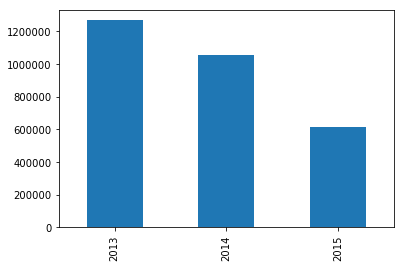

In [35]:
#transaction every year
sales_train.year.value_counts().plot.bar()

Its interesting to see decrease in transactions every year.

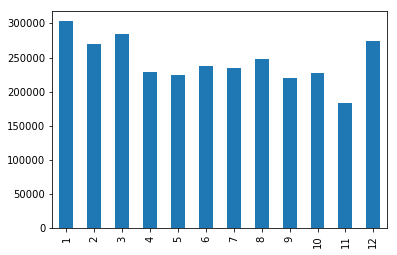

In [41]:
#transactions trend by months
sales_train.month.value_counts().sort_index().plot.bar()

In [45]:
sales_train.month.value_counts().describe()

count        12.000000
mean     244654.083333
std       33121.587466
min      183164.000000
25%      226516.750000
50%      236142.500000
75%      271196.250000
max      303561.000000
Name: month, dtype: float64

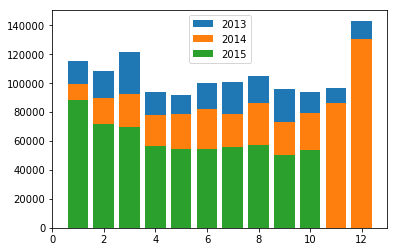

In [64]:
## plot number of trasactions for different months every year.
sales_per_month_2013 = sales_train.month[sales_train.year == 2013].value_counts().sort_index()
p1 = plt.bar(sales_per_month_2013.index, sales_per_month_2013.values)
sales_per_month_2014 = sales_train.month[sales_train.year == 2014].value_counts().sort_index()
p2 = plt.bar(sales_per_month_2014.index, sales_per_month_2014.values)
sales_per_month_2015 = sales_train.month[sales_train.year == 2015].value_counts().sort_index()
p3 = plt.bar(sales_per_month_2015.index, sales_per_month_2015.values)
plt.legend((p1[0], p2[0], p3[0]), ('2013', '2014', '2015'))
plt.show()

clearly we can see a trend in the number of transactions happening every year. Seems like the 1st three months and the last two months are having most number of transactions. And also this plot proves decrease in the transactions every year.

In [110]:
from itertools import product
index_cols = ['shop_id', 'item_id', 'date_block_num']

# For every month we create a grid from all shops/items combinations from that month
grid = [] 
for block_num in sales_train['date_block_num'].unique():
    cur_shops = sales_train[sales_train['date_block_num']==block_num]['shop_id'].unique()
    cur_items = sales_train[sales_train['date_block_num']==block_num]['item_id'].unique()
    grid.append(np.array(list(product(*[cur_shops, cur_items, [block_num]])),dtype='int32'))

#turn the grid into pandas dataframe
grid = pd.DataFrame(np.vstack(grid), columns = index_cols,dtype=np.int32)

#get aggregated values for (shop_id, item_id, month)
gb = sales_train.groupby(index_cols,as_index=False).agg({'item_cnt_day':{'target':'sum'}, 'item_price' : {'max_price':'max', 'min_price':'min', 'avg_price': 'mean'}})

#fix column names
gb.columns = [col[0] if col[-1]=='' else col[-1] for col in gb.columns.values]
#join aggregated data to the grid
all_data = pd.merge(grid,gb,how='left',on=index_cols).fillna(0)
#sort the data
all_data.sort_values(['date_block_num','shop_id','item_id'],inplace=True)

/Users/arjasethan/anaconda/lib/python3.6/site-packages/pandas/core/groupby.py:3961: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [112]:
all_data.head(10)

,shop_id,item_id,date_block_num,target,max_price,min_price,avg_price
139255,0,19,0,0.0,0.0,0.0,0.0
141495,0,27,0,0.0,0.0,0.0,0.0
144968,0,28,0,0.0,0.0,0.0,0.0
142661,0,29,0,0.0,0.0,0.0,0.0
138947,0,32,0,6.0,221.0,221.0,221.0
138948,0,33,0,3.0,347.0,347.0,347.0
138949,0,34,0,0.0,0.0,0.0,0.0
139247,0,35,0,1.0,247.0,247.0,247.0
142672,0,40,0,0.0,0.0,0.0,0.0
142065,0,41,0,0.0,0.0,0.0,0.0


In [113]:
from sklearn.model_selection import KFold
target = all_data.target.values
kf = KFold(n_splits = 5, shuffle = False)
all_data['item_target_enc'] = np.nan
for tr_inds, val_inds in kf.split(target):
    tr_fold, val_fold = all_data.iloc[tr_inds], all_data.iloc[val_inds]
    val_fold['item_target_enc'] = val_fold['item_id'].map(tr_fold.groupby('item_id').target.mean())
    all_data.iloc[val_inds, :] = val_fold

global_mean = all_data.target.mean()
all_data.fillna(global_mean, inplace= True)

/Users/arjasethan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [114]:
all_data.head(10)

,shop_id,item_id,date_block_num,target,max_price,min_price,avg_price,item_target_enc
139255,0,19,0,0.0,0.0,0.0,0.0,0.334273
141495,0,27,0,0.0,0.0,0.0,0.0,0.048523
144968,0,28,0,0.0,0.0,0.0,0.0,0.142424
142661,0,29,0,0.0,0.0,0.0,0.0,0.030303
138947,0,32,0,6.0,221.0,221.0,221.0,0.894020
138948,0,33,0,3.0,347.0,347.0,347.0,0.485238
138949,0,34,0,0.0,0.0,0.0,0.0,0.107018
139247,0,35,0,1.0,247.0,247.0,247.0,0.020408
142672,0,40,0,0.0,0.0,0.0,0.0,0.054717
142065,0,41,0,0.0,0.0,0.0,0.0,0.038136


In [115]:
#shop id mean encoding
from sklearn.model_selection import KFold
target = all_data.target.values
kf = KFold(n_splits = 5, shuffle = False)
all_data['shop_target_enc'] = np.nan
for tr_inds, val_inds in kf.split(target):
    tr_fold, val_fold = all_data.iloc[tr_inds], all_data.iloc[val_inds]
    val_fold['shop_target_enc'] = val_fold['shop_id'].map(tr_fold.groupby('shop_id').target.mean())
    all_data.iloc[val_inds, :] = val_fold

global_mean = all_data.target.mean()
all_data.fillna(global_mean, inplace= True)

/Users/arjasethan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [116]:
all_data.head(10)

,shop_id,item_id,date_block_num,target,max_price,min_price,avg_price,item_target_enc,shop_target_enc
139255,0,19,0,0.0,0.0,0.0,0.0,0.334273,0.334273
141495,0,27,0,0.0,0.0,0.0,0.0,0.048523,0.334273
144968,0,28,0,0.0,0.0,0.0,0.0,0.142424,0.334273
142661,0,29,0,0.0,0.0,0.0,0.0,0.030303,0.334273
138947,0,32,0,6.0,221.0,221.0,221.0,0.894020,0.334273
138948,0,33,0,3.0,347.0,347.0,347.0,0.485238,0.334273
138949,0,34,0,0.0,0.0,0.0,0.0,0.107018,0.334273
139247,0,35,0,1.0,247.0,247.0,247.0,0.020408,0.334273
142672,0,40,0,0.0,0.0,0.0,0.0,0.054717,0.334273
142065,0,41,0,0.0,0.0,0.0,0.0,0.038136,0.334273


In [133]:
train_cols = ['item_target_enc', 'shop_target_enc', 'date_block_num', 'avg_price']
all_data_train = all_data.loc[:, train_cols]
all_data_label = all_data.target

In [134]:
all_data_label.describe()

count    1.091385e+07
mean     3.342731e-01
std      3.417243e+00
min     -2.200000e+01
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.253000e+03
Name: target, dtype: float64

In [135]:
## lets calculate the baseline accuracy 
total_mean = all_data_label.values.mean()
print('baseline rmse of the data', np.sqrt(np.sum((all_data_label.values - total_mean) ** 2)))

baseline rmse of the data 11289.2440415


In [147]:
cutoff = np.int(np.ceil(len(all_data_label)* 0.75))
X_train, X_val, y_train, y_val = all_data_train.values[0: cutoff], all_data_train.values[cutoff: ], all_data_label.values[0: cutoff], all_data_label.values[cutoff:]

In [148]:
from sklearn.ensemble import GradientBoostingRegressor

In [149]:
gbr = GradientBoostingRegressor()

In [150]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [152]:
print('train r-squared',gbr.score(X_train, y_train))
print('val r-squared', gbr.score(X_val, y_val))

train r-squared 0.630385205121
test r-squared 0.107727017518


In [154]:
print('train rmse', np.sqrt(np.sum((y_train - gbr.predict(X_train)) ** 2)))
print('val rmse', np.sqrt(np.sum((y_val - gbr.predict(X_val)) ** 2)))

train rmse 5526.22649084
val rmse 6324.0828073


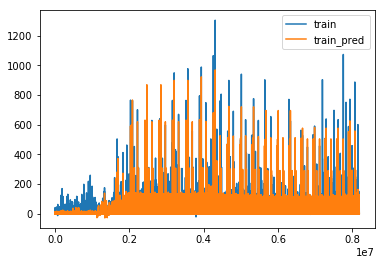

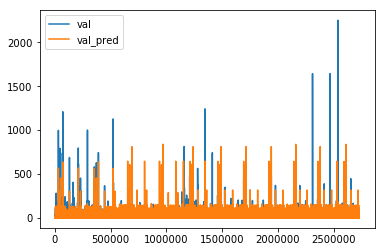

In [162]:
# plt.subplot(2,1,1)
plt.plot(range(len(y_train)), y_train)
plt.plot(range(len(y_train)), gbr.predict(X_train))
plt.legend(('train', 'train_pred'))
plt.show()
# plt.subplot(2,1,2)
plt.plot(range(len(y_val)), y_val)
plt.plot(range(len(y_val)), gbr.predict(X_val))
plt.legend(('val', 'val_pred'))
plt.show()


In [163]:
gbr_huber = GradientBoostingRegressor(loss='huber')

In [164]:
gbr_huber.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [165]:
print('train r-squared',gbr_huber.score(X_train, y_train))
print('val r-squared', gbr_huber.score(X_val, y_val))

train r-squared 0.0665493236303
val r-squared 0.0359718061506


In [166]:
print('train rmse', np.sqrt(np.sum((y_train - gbr_huber.predict(X_train)) ** 2)))
print('val rmse', np.sqrt(np.sum((y_val - gbr_huber.predict(X_val)) ** 2)))

train rmse 8782.12661853
val rmse 6573.45272836


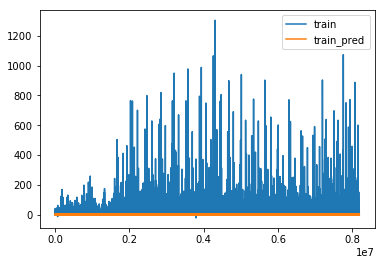

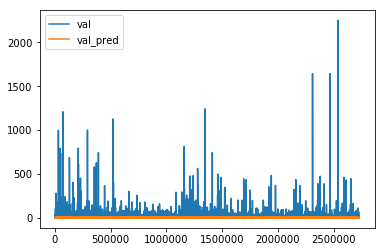

In [167]:
# plt.subplot(2,1,1)
plt.plot(range(len(y_train)), y_train)
plt.plot(range(len(y_train)), gbr_huber.predict(X_train))
plt.legend(('train', 'train_pred'))
plt.show()
# plt.subplot(2,1,2)
plt.plot(range(len(y_val)), y_val)
plt.plot(range(len(y_val)), gbr_huber.predict(X_val))
plt.legend(('val', 'val_pred'))
plt.show()

In [174]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
grid_params = {'n_estimators': [100, 200, 300],
               'learning_rate': [0.1, 0.05, 0.01],
               'max_depth':[4, 6, 10],
               'min_samples_leaf':[3,5,9]
              }
cv = TimeSeriesSplit(n_splits=3)
est = GradientBoostingRegressor()
gs_cv = GridSearchCV(est, grid_params, cv = cv, n_jobs = 4)

In [175]:
gs_best_model = gs_cv.fit(X_train, y_train)

/Users/arjasethan/anaconda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:96: FutureWarning: np.average currently does not preserve subclasses, but will do so in the future to match the behavior of most other numpy functions such as np.mean. In particular, this means calls which returned a scalar may return a 0-d subclass object instead.
  self.mean = np.average(y, weights=sample_weight)
/Users/arjasethan/anaconda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:96: FutureWarning: np.average currently does not preserve subclasses, but will do so in the future to match the behavior of most other numpy functions such as np.mean. In particular, this means calls which returned a scalar may return a 0-d subclass object instead.
  self.mean = np.average(y, weights=sample_weight)
/Users/arjasethan/anaconda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:96: FutureWarning: np.average currently does not preserve subclasses, but will do so in

/Users/arjasethan/anaconda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:96: FutureWarning: np.average currently does not preserve subclasses, but will do so in the future to match the behavior of most other numpy functions such as np.mean. In particular, this means calls which returned a scalar may return a 0-d subclass object instead.
  self.mean = np.average(y, weights=sample_weight)
/Users/arjasethan/anaconda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:96: FutureWarning: np.average currently does not preserve subclasses, but will do so in the future to match the behavior of most other numpy functions such as np.mean. In particular, this means calls which returned a scalar may return a 0-d subclass object instead.
  self.mean = np.average(y, weights=sample_weight)
/Users/arjasethan/anaconda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:96: FutureWarning: np.average currently does not preserve subclasses, but will do so in

/Users/arjasethan/anaconda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:96: FutureWarning: np.average currently does not preserve subclasses, but will do so in the future to match the behavior of most other numpy functions such as np.mean. In particular, this means calls which returned a scalar may return a 0-d subclass object instead.
  self.mean = np.average(y, weights=sample_weight)
/Users/arjasethan/anaconda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:96: FutureWarning: np.average currently does not preserve subclasses, but will do so in the future to match the behavior of most other numpy functions such as np.mean. In particular, this means calls which returned a scalar may return a 0-d subclass object instead.
  self.mean = np.average(y, weights=sample_weight)
/Users/arjasethan/anaconda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:96: FutureWarning: np.average currently does not preserve subclasses, but will do so in

/Users/arjasethan/anaconda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:96: FutureWarning: np.average currently does not preserve subclasses, but will do so in the future to match the behavior of most other numpy functions such as np.mean. In particular, this means calls which returned a scalar may return a 0-d subclass object instead.
  self.mean = np.average(y, weights=sample_weight)
/Users/arjasethan/anaconda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:96: FutureWarning: np.average currently does not preserve subclasses, but will do so in the future to match the behavior of most other numpy functions such as np.mean. In particular, this means calls which returned a scalar may return a 0-d subclass object instead.
  self.mean = np.average(y, weights=sample_weight)
/Users/arjasethan/anaconda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:96: FutureWarning: np.average currently does not preserve subclasses, but will do so in

/Users/arjasethan/anaconda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:96: FutureWarning: np.average currently does not preserve subclasses, but will do so in the future to match the behavior of most other numpy functions such as np.mean. In particular, this means calls which returned a scalar may return a 0-d subclass object instead.
  self.mean = np.average(y, weights=sample_weight)
/Users/arjasethan/anaconda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:96: FutureWarning: np.average currently does not preserve subclasses, but will do so in the future to match the behavior of most other numpy functions such as np.mean. In particular, this means calls which returned a scalar may return a 0-d subclass object instead.
  self.mean = np.average(y, weights=sample_weight)
/Users/arjasethan/anaconda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:96: FutureWarning: np.average currently does not preserve subclasses, but will do so in

/Users/arjasethan/anaconda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:96: FutureWarning: np.average currently does not preserve subclasses, but will do so in the future to match the behavior of most other numpy functions such as np.mean. In particular, this means calls which returned a scalar may return a 0-d subclass object instead.
  self.mean = np.average(y, weights=sample_weight)
/Users/arjasethan/anaconda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:96: FutureWarning: np.average currently does not preserve subclasses, but will do so in the future to match the behavior of most other numpy functions such as np.mean. In particular, this means calls which returned a scalar may return a 0-d subclass object instead.
  self.mean = np.average(y, weights=sample_weight)
/Users/arjasethan/anaconda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:96: FutureWarning: np.average currently does not preserve subclasses, but will do so in

/Users/arjasethan/anaconda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:96: FutureWarning: np.average currently does not preserve subclasses, but will do so in the future to match the behavior of most other numpy functions such as np.mean. In particular, this means calls which returned a scalar may return a 0-d subclass object instead.
  self.mean = np.average(y, weights=sample_weight)
/Users/arjasethan/anaconda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:96: FutureWarning: np.average currently does not preserve subclasses, but will do so in the future to match the behavior of most other numpy functions such as np.mean. In particular, this means calls which returned a scalar may return a 0-d subclass object instead.
  self.mean = np.average(y, weights=sample_weight)
/Users/arjasethan/anaconda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:96: FutureWarning: np.average currently does not preserve subclasses, but will do so in

/Users/arjasethan/anaconda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:96: FutureWarning: np.average currently does not preserve subclasses, but will do so in the future to match the behavior of most other numpy functions such as np.mean. In particular, this means calls which returned a scalar may return a 0-d subclass object instead.
  self.mean = np.average(y, weights=sample_weight)
/Users/arjasethan/anaconda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:96: FutureWarning: np.average currently does not preserve subclasses, but will do so in the future to match the behavior of most other numpy functions such as np.mean. In particular, this means calls which returned a scalar may return a 0-d subclass object instead.
  self.mean = np.average(y, weights=sample_weight)
/Users/arjasethan/anaconda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:96: FutureWarning: np.average currently does not preserve subclasses, but will do so in

/Users/arjasethan/anaconda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:96: FutureWarning: np.average currently does not preserve subclasses, but will do so in the future to match the behavior of most other numpy functions such as np.mean. In particular, this means calls which returned a scalar may return a 0-d subclass object instead.
  self.mean = np.average(y, weights=sample_weight)
/Users/arjasethan/anaconda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:96: FutureWarning: np.average currently does not preserve subclasses, but will do so in the future to match the behavior of most other numpy functions such as np.mean. In particular, this means calls which returned a scalar may return a 0-d subclass object instead.
  self.mean = np.average(y, weights=sample_weight)
/Users/arjasethan/anaconda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:96: FutureWarning: np.average currently does not preserve subclasses, but will do so in

/Users/arjasethan/anaconda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:96: FutureWarning: np.average currently does not preserve subclasses, but will do so in the future to match the behavior of most other numpy functions such as np.mean. In particular, this means calls which returned a scalar may return a 0-d subclass object instead.
  self.mean = np.average(y, weights=sample_weight)
/Users/arjasethan/anaconda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:96: FutureWarning: np.average currently does not preserve subclasses, but will do so in the future to match the behavior of most other numpy functions such as np.mean. In particular, this means calls which returned a scalar may return a 0-d subclass object instead.
  self.mean = np.average(y, weights=sample_weight)
/Users/arjasethan/anaconda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:96: FutureWarning: np.average currently does not preserve subclasses, but will do so in

/Users/arjasethan/anaconda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:96: FutureWarning: np.average currently does not preserve subclasses, but will do so in the future to match the behavior of most other numpy functions such as np.mean. In particular, this means calls which returned a scalar may return a 0-d subclass object instead.
  self.mean = np.average(y, weights=sample_weight)
/Users/arjasethan/anaconda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:96: FutureWarning: np.average currently does not preserve subclasses, but will do so in the future to match the behavior of most other numpy functions such as np.mean. In particular, this means calls which returned a scalar may return a 0-d subclass object instead.
  self.mean = np.average(y, weights=sample_weight)
/Users/arjasethan/anaconda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:96: FutureWarning: np.average currently does not preserve subclasses, but will do so in

/Users/arjasethan/anaconda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:96: FutureWarning: np.average currently does not preserve subclasses, but will do so in the future to match the behavior of most other numpy functions such as np.mean. In particular, this means calls which returned a scalar may return a 0-d subclass object instead.
  self.mean = np.average(y, weights=sample_weight)
/Users/arjasethan/anaconda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:96: FutureWarning: np.average currently does not preserve subclasses, but will do so in the future to match the behavior of most other numpy functions such as np.mean. In particular, this means calls which returned a scalar may return a 0-d subclass object instead.
  self.mean = np.average(y, weights=sample_weight)
/Users/arjasethan/anaconda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:96: FutureWarning: np.average currently does not preserve subclasses, but will do so in

/Users/arjasethan/anaconda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:96: FutureWarning: np.average currently does not preserve subclasses, but will do so in the future to match the behavior of most other numpy functions such as np.mean. In particular, this means calls which returned a scalar may return a 0-d subclass object instead.
  self.mean = np.average(y, weights=sample_weight)
/Users/arjasethan/anaconda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:96: FutureWarning: np.average currently does not preserve subclasses, but will do so in the future to match the behavior of most other numpy functions such as np.mean. In particular, this means calls which returned a scalar may return a 0-d subclass object instead.
  self.mean = np.average(y, weights=sample_weight)
/Users/arjasethan/anaconda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:96: FutureWarning: np.average currently does not preserve subclasses, but will do so in

In [176]:
gs_best_model.best_params_

{'learning_rate': 0.05,
 'max_depth': 4,
 'min_samples_leaf': 3,
 'n_estimators': 100}

In [178]:
print('train r-squared',gs_best_model.best_estimator_.score(X_train, y_train))
print('val r-squared', gs_best_model.best_estimator_.score(X_val, y_val))

train r-squared 0.643136869325
val r-squared 0.14963963825


In [179]:
print('train rmse', np.sqrt(np.sum((y_train - gs_best_model.best_estimator_.predict(X_train)) ** 2)))
print('val rmse', np.sqrt(np.sum((y_val - gs_best_model.best_estimator_.predict(X_val)) ** 2)))

train rmse 5430.0627403
val rmse 6173.76622387


In [181]:
test.head(10)

,ID,shop_id,item_id,item_cnt_day
0,0,5,5037,-999
1,1,5,5320,-999
2,2,5,5233,-999
3,3,5,5232,-999
4,4,5,5268,-999
5,5,5,5039,-999
6,6,5,5041,-999
7,7,5,5046,-999
8,8,5,5319,-999
9,9,5,5003,-999


In [206]:
test['shop_id_enc'] = test.shop_id.map(all_data.groupby('shop_id').target.mean())
test['item_id_enc'] = test.item_id.map(all_data.groupby('item_id').target.mean())
test.fillna(global_mean, inplace=True)
test['date_block_num'] = 34

test.head(10)

,ID,shop_id,item_id,shop_id_enc,item_id_enc,date_block_num
0,0,5,5037,0.189382,1.950845,34
1,1,5,5320,0.189382,0.334273,34
2,2,5,5233,0.189382,1.656863,34
3,3,5,5232,0.189382,1.093023,34
4,4,5,5268,0.189382,0.334273,34
5,5,5,5039,0.189382,1.599078,34
6,6,5,5041,0.189382,3.574713,34
7,7,5,5046,0.189382,1.007286,34
8,8,5,5319,0.189382,3.072860,34
9,9,5,5003,0.189382,1.229885,34


In [207]:
test = pd.merge(test,all_data.groupby(['shop_id', 'item_id'], as_index= False).agg({'avg_price': np.mean}),how='left',on=['shop_id', 'item_id'])

In [213]:
test.avg_price[test.avg_price.isnull()] = test.item_id[test.avg_price.isnull()].map(all_data.groupby('item_id').avg_price.mean())

/Users/arjasethan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [215]:
test.avg_price[test.avg_price.isnull()] = test.shop_id[test.avg_price.isnull()].map(all_data.groupby('shop_id').avg_price.mean())

/Users/arjasethan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
test['shop_id_enc'] = test.shop_id_enc.astype('float32')
test['item_id_enc'] = test.item_id_enc.astype('float32')
test['avg_price'] = test.avg_price.astype('float32')
test['date_block_num'] = test.date_block_num.astype('int32')

In [259]:
submit1 = pd.DataFrame({'item_cnt_month': gs_best_model.best_estimator_.predict(test.loc[:, ['shop_id_enc', 'item_id_enc', 'date_block_num', 'avg_price']])})

In [261]:
submit1.to_csv('data/submit1.csv')

In [264]:
submit1.item_cnt_month = submit1.item_cnt_month.clip(0,20)

In [265]:
submit1.to_csv('data/submit2.csv')